# Titanic Survival Prediction

In this Kaggle machine learning problem, we were tasked to identify survival rates based on features from the titanic accident. Please keep in mind, this was my first data science project and there are opportunities for improvement. Nonetheless, keeping this project will demonstrate the considerable improvement in my data science capabilities. 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [45]:
dataset=pd.read_csv(r'C:\Users\claudius.ibine\Desktop\titanic-dataset.csv')
dataset=dataset[['Pclass','Sex','Age','Embarked','Survived']]

Here is where I summarized the dataset.

In [46]:
def aggregrate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(5))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [47]:
aggregrate()

The number of rows by columns:  (891, 5)

The first 10 records are:
   Pclass     Sex   Age Embarked  Survived
0       3    male  22.0        S         0
1       1  female  38.0        C         1
2       3  female  26.0        S         1
3       1  female  35.0        S         1
4       3    male  35.0        S         0

The dataset datatypes are:
Pclass        int64
Sex          object
Age         float64
Embarked     object
Survived      int64
dtype: object


Here is where I cleaned the dataset.

In [48]:
def clean():
    print(train.isnull().sum()) #check nulll values
    print(train.describe()) #check for low values in min

In [49]:
clean()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64
           Pclass         Age    Survived
count  891.000000  714.000000  891.000000
mean     2.308642   29.699118    0.383838
std      0.836071   14.526497    0.486592
min      1.000000    0.420000    0.000000
25%      2.000000   20.125000    0.000000
50%      3.000000   28.000000    0.000000
75%      3.000000   38.000000    1.000000
max      3.000000   80.000000    1.000000


In [50]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [51]:
print(dataset.head(21))

    Pclass     Sex        Age Embarked  Survived
0        3    male  22.000000        S         0
1        1  female  38.000000        C         1
2        3  female  26.000000        S         1
3        1  female  35.000000        S         1
4        3    male  35.000000        S         0
5        3    male  29.699118        Q         0
6        1    male  54.000000        S         0
7        3    male   2.000000        S         0
8        3  female  27.000000        S         1
9        2  female  14.000000        C         1
10       3  female   4.000000        S         1
11       1  female  58.000000        S         1
12       3    male  20.000000        S         0
13       3    male  39.000000        S         0
14       3  female  14.000000        S         0
15       2  female  55.000000        S         1
16       3    male   2.000000        Q         0
17       2    male  29.699118        S         1
18       3  female  31.000000        S         0
19       3  female  

Here I will convert the string values to numericals for the machine learning model.

In [52]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.Sex=le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    return processed_df
dataset=preprocess_dataset(dataset)

Here I will rename a few columns.

In [53]:
dataset=dataset.rename(columns={'Pclass': 'pclass'})
dataset=dataset.rename(columns={'Sex': 'gender'})
dataset=dataset.rename(columns={'Age': 'age'})
dataset=dataset.rename(columns={'Embarked': 'embarked'})
dataset=dataset.rename(columns={'Survived': 'survived'})

Here I will identify the feature and target column and split the dataset into training and testing

In [54]:
feature=['pclass','gender','age','embarked']
target='survived'

x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [55]:
def algorithms():
    print('The predicted accuracy scores for the models are as follows:')
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_prediction=lr.predict(x_test)
    print('LR: {0:4f}'.format(metrics.accuracy_score(y_test,lr_prediction)))

    lda=LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    lda_prediction=lda.predict(x_test)
    print('LDA: {0:4f}'.format(metrics.accuracy_score(y_test,lda_prediction)))

    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_prediction=knn.predict(x_test)
    print('KNN: {0:4f}'.format(metrics.accuracy_score(y_test,knn_prediction)))

    cart=DecisionTreeClassifier()
    cart.fit(x_train,y_train)
    cart_prediction=cart.predict(x_test)
    print('CART: {0:4f}'.format(metrics.accuracy_score(y_test,cart_prediction)))

    nb=GaussianNB()
    nb.fit(x_train,y_train)
    nb_prediction=nb.predict(x_test)
    print('NB: {0:4f}'.format(metrics.accuracy_score(y_test,nb_prediction)))

    svm=SVC()
    svm.fit(x_train,y_train)
    svm_prediction=svm.predict(x_test)
    print('SVM: {0:4f}'.format(metrics.accuracy_score(y_test,svm_prediction)))

In [56]:
algorithms()

The predicted accuracy scores for the models are as follows:
LR: 0.806723
LDA: 0.803922
KNN: 0.764706
CART: 0.815126
NB: 0.795518
SVM: 0.801120


Here I will fit the machine learning model.

In [57]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)

In [58]:
features=x_test.reset_index()
features=features[['pclass','gender','age','embarked']]
actual=(list(y_test))
prediction=(list(lr_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
output=features

In [59]:
print(output.head(10))

   pclass  gender        age  embarked  actual  prediction
0       3       1  19.000000         2       0           0
1       3       1  20.000000         2       0           0
2       3       0  29.699118         1       1           1
3       1       0  44.000000         0       1           1
4       3       1  10.000000         2       0           0
5       1       1  29.699118         2       1           0
6       2       0   6.000000         2       1           1
7       3       0  29.699118         1       1           1
8       1       1  51.000000         0       0           0
9       2       1  52.000000         2       0           0


In [60]:
print(output[['actual','prediction']])

     actual  prediction
0         0           0
1         0           0
2         1           1
3         1           1
4         0           0
5         1           0
6         1           1
7         1           1
8         0           0
9         0           0
10        0           0
11        0           0
12        1           1
13        0           0
14        1           1
15        0           0
16        0           0
17        0           1
18        0           0
19        1           1
20        1           0
21        0           0
22        0           0
23        0           0
24        1           1
25        0           1
26        1           1
27        1           1
28        0           0
29        0           0
..      ...         ...
327       1           1
328       1           1
329       1           1
330       1           1
331       0           0
332       0           1
333       1           1
334       0           0
335       0           0
336       0     

In [61]:
output=output[['actual','prediction']]

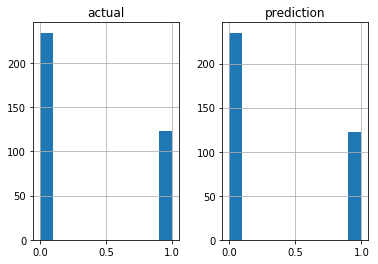

In [65]:
output.hist()
plt.show()